Authors: Leonardo De Clara, Riccardo Sena

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal, norm, uniform, beta

# ***Assignment 2***
Welcome to Assignment 2! In this assignment you are allowed to work ***individually or in pairs***. It is worth 30 points in total. Exercises 1 is worth 5 points, exercise 2 is worth 10 points, and 3 can give you 15 points.

There is a 5 point minimum for passing this assignment (you need to pass all four assignments to be able to pass the course).

Submission details: Your submission should contain two pdf's.

1. A pdf version of your filled out colaboratory on Canvas. You can do this by pressing `cmd/ctrl+p` (you know the drill from there).  
2. For exercise 1, you need to hand in your hand-written solutions in a LaTeX pdf. We only accept solutions written in LaTeX, i.e. not Word or any other text editor. We recommend [Overleaf](https://overleaf.com), if you do not already have a favourite LaTeX editor (which is also [provided by KTH](https://intra.kth.se/en/it/programvara-o-system/programvara/installera/download/overleaf/overleaf-1.932755)).

# Contents
In this assignment we will experiment with the following topics (not necessarily in this order):
* Conjugate priors
* Gibbs sampling
* Metropolis-Hastings
* Convergence diagnostics
* Probabilistic modelling
* Bayesian decision theory
* The Predictive posterior distribution

# ***1. Conjugate Priors***

Conjugate distributions are very important and widely used distributions in Bayesian statistics. Having a closed-form expression for the posterior distribution provides great convenience.

It is important to feel confident with derivations and being able to find closed-form expressions. For this task, we give you well-known likelihood functions & prior distributions and ask you to *derive* the closed form expressions of the posterior distributions.

For this exercise, you need to hand in your hand-written solutions in a LaTeX pdf. We only accept solutions written in LaTeX.

**Q1.1 There are $N$ i.i.d. data points sampled from a Normal distribution; $\mathcal{N}(x_i | \mu, \sigma^2)$ for $i \in[N]$ where $\mu$ is the mean and $\sigma^2$ is the variance. Assume $\sigma^2$ is known and the mean has the Normal prior distribution $\mathcal{N}(\mu | \mu_0, \sigma_0^2)$. 
Show the posterior distribution of mean is 
\begin{align*}
\mathcal{N} \left( \mu \;|\; \frac{\sigma^2_0 N}{\sigma^2+N\sigma^2_0}\bar{x} +   \frac{\sigma^2}{\sigma^2+N\sigma^2_0}\mu_0, \; \left( \frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}\right) ^{-1} \right) \\
\end{align*} 
where $\bar{x}$ is the sample mean.**

**Q1.2 There are $N$ i.i.d. data points sampled from a Normal distribution; $\mathcal{N}(x_i | \mu, \sigma^2)$ for $i \in[N]$ where $\mu$ is the mean and $\sigma^2$ is the variance. Assume $\mu$ is known and the variance has the Inverse-Gamma prior distribution $\mathcal{IG}(\sigma^2 | \alpha, \beta)$. Show the posterior distribution of variance is
\begin{align*}
\mathcal{IG}\left( \sigma^2 \;|\; \alpha + \frac{N}{2}, \; \beta+\frac{1}{2}\sum_{i=1}^N (x_i - \mu)^2 \right)
\end{align*}
.**

**Q1.3 There are $N$ i.i.d. data points sampled from a Normal distribution; $\mathcal{N}(x_i | \mu, \tau^{-1})$ for $i \in[N]$ where $\mu$ is the mean and $\tau=1/\sigma^2$ is the precision. Assume $\mu$ has the Normal prior $\mathcal{N}(\mu | \mu_0, (n_0 \tau)^{-1})$ and the precision has the Gamma prior distribution $Ga(\tau | \alpha, \beta)$. 
Show the posterior distributions of mean and precision are
\begin{align*}
&\mathcal{N}\left( \mu \;|\; \frac{N}{N+n_0}\bar{x} +\frac{n_0}{N+n_0}\mu_0, \; (N\tau+n_0\tau)^{-1} \right)\\
&Ga\left(\tau \;|\; \alpha + \frac{N}{2}, \; \beta+\frac{1}{2}\sum_{i=1}^N (x_i - \bar{x})^2 + \frac{N n_0}{2(N+n_0)}(\bar{x}-\mu_0)^2 \right)
\end{align*} 
where $\bar{x}$ is the sample mean.**


# ***2. The Two-Dimensional Gaussian***

Consider the following posterior, $$p(\theta|x) = \mathcal{N}\left(\theta|x, \Sigma\right),$$ where $\theta=(\mu_1, \mu_2)$ are the unknown means of the Gaussian distribution that generated $x = (x_1, x_2)$, i.e. $$x \sim \mathcal{N}(x| \theta, \Sigma).$$ Furthermore, the covariance matrix is known, $$\Sigma = \left(\begin{matrix} 1 & 0.8 \\0.8 & 1 \end{matrix}\right),$$ and the prior on $\theta$ is uniform.





**Q2.1 Use Bayes' rule to derive the considered posterior, given what you know above. That is, clearly specify the joint distribution, the likelihood function, the prior distribution and the marginal likelihood, and then show that $p(\theta|x) = \mathcal{N}(\theta|x, \Sigma)$.**

*Answer here*\
From Bayes' rule we have that
$$
p(\theta|x) = \frac{p(x|\theta)p(\theta)}{p(x)}
$$
where $p(x|\theta)$ is the likelihood function, $p(\theta)$ is the prior distribution and $p(x)$ is the marginal likelihood.

Prior: $p(\theta)$ is a uniform distribution over $\mathbb{R}^2$, therefore it can be defined as $p(\theta)=k \cdot \mathbb{1}_{\{\theta \in \mathbb{R}^2\}} $\
Likelihood: $p(x|\theta) = \mathcal{N}(x| \theta, \Sigma)$ since we know that samples x are generated from a distribution $\mathcal{N}(x| \theta, \Sigma)$\
Marginal likelihood: $p(x) = \int p(x|\theta)p(\theta)d\theta$. We can compute it analytically knowing that the prior is a constant value $k$ and the likelihood is a Gaussian distribution. Therefore we have that 
$$p(x) = \int_{\mathbb{R}^2} k \frac{1}{2\pi |\Sigma|^{1/2}} exp{(-\frac{1}{2}(x-\theta)^T\Sigma^{-1}(x-\theta))}d\theta$$
By rearranging the terms in the exponent and bringing k out of the integral we have that
$$p(x) = k \int_{\mathbb{R}^2} \frac{1}{2\pi |\Sigma|^{1/2}} exp{(-\frac{1}{2}(\theta-x)^T\Sigma^{-1}(\theta-x))}d\theta$$
We can now recognize that the integral is the integral of a Gaussian distribution with mean $\mu = x$ and covariance $\Sigma$, thus its value is $1$. Therefore we have that $p(x)=k$.\
Using the marginal likelihood value obtained above we can compute the posterior distribution $p(\theta|x)$ as 
$$
p(\theta|x) = \frac{p(x|\theta)p(\theta)}{p(x)} = \frac{k \frac{1}{2\pi |\Sigma|^{1/2}} exp{(-\frac{1}{2}(x-\theta)^T\Sigma^{-1}(x-\theta))}}{k} = \frac{1}{2\pi |\Sigma|^{1/2}} exp{(-\frac{1}{2}(\theta-x)^T\Sigma^{-1}(\theta-x))} = \mathcal{N}(\theta|x, \Sigma)
$$


Although this problem is not intractable, we are now going to use MCMC to sample from the posterior. We will assume that $x = (0, 0)$.

Before we start using MCMC, let's utilize that we know the posterior distribution by sampling from it directly.

**Q2.2 Sample 10000 values of $\theta$ from $p(\theta|x)$. Visualize the samples in a scatter plot.**

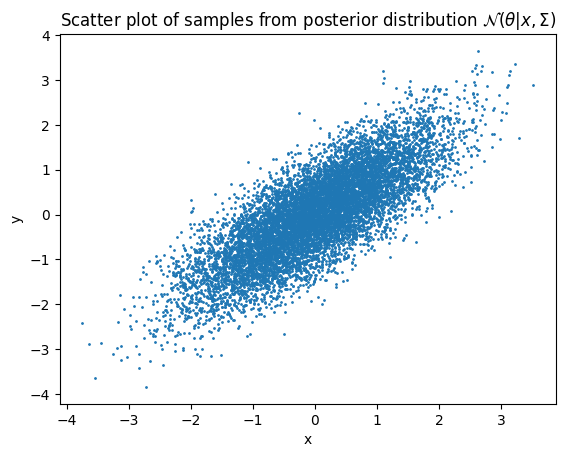

In [2]:
num_samples = 10000
mean = [0,0]
cov = [[1,0.8],[0.8,1]]
samples = np.random.multivariate_normal(mean, cov, num_samples)

plt.scatter(samples[:,0], samples[:,1], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of samples from posterior distribution $\mathcal{N}(\\theta|x, \Sigma)$')
plt.show()

Now we shall generate and compare samples from two MCMC algorithms, specifically the Metropolis-Hastings (MH) algorithm and Gibbs sampling. Recall that in MCMC algorithms we are evaluating our Markov chain samples using the joint distribution, and not the posterior.

**Q2.3 Let the proposal distribution $q(\theta'|\theta^{t})$ be a Gaussian with $\sigma^2$ variance. Write an MH algorithm that samples 10k points from $p(\theta|x)$, and scatter plot the samples.**

**Tune $\sigma^2$ so that the MH samples are similar to those generated in Q2.1, and report $\sigma^2$.**

In [3]:
def metropolis_hastings_gaussian(num_samples, mean, cov,proposal_std,burn_in=0):

    def target(x):
        return multivariate_normal.pdf(x,mean=mean,cov=cov)

    samples = np.zeros((num_samples, 2))
    samples[0] = np.random.uniform(-1, 1, 2) # initialize the first sample
    accept_count = 0
    for i in range(1, num_samples):
        new_sample = np.random.multivariate_normal(samples[i-1], proposal_std**2 * np.eye(2))
       
        # compute the acceptance probability
        #proposal distribution is symmetric, so it cancels out
        accep_p = min(1, 
                target(new_sample) / target(samples[i-1]))
                
        # accept or reject the new sample
        if np.random.uniform(0, 1) < accep_p:
            samples[i] = new_sample
            if (i > int(burn_in*num_samples)):
                accept_count += 1
        else:
            samples[i] = samples[i-1]

    accept_rate = np.around(accept_count / num_samples, 3)

    return samples[burn_in:], accept_rate

Acceptance rate with proposal std = 0.1: 92.0%
Acceptance rate with proposal std = 0.5: 63.4%
Acceptance rate with proposal std = 1: 41.199999999999996%
Acceptance rate with proposal std = 2: 18.4%


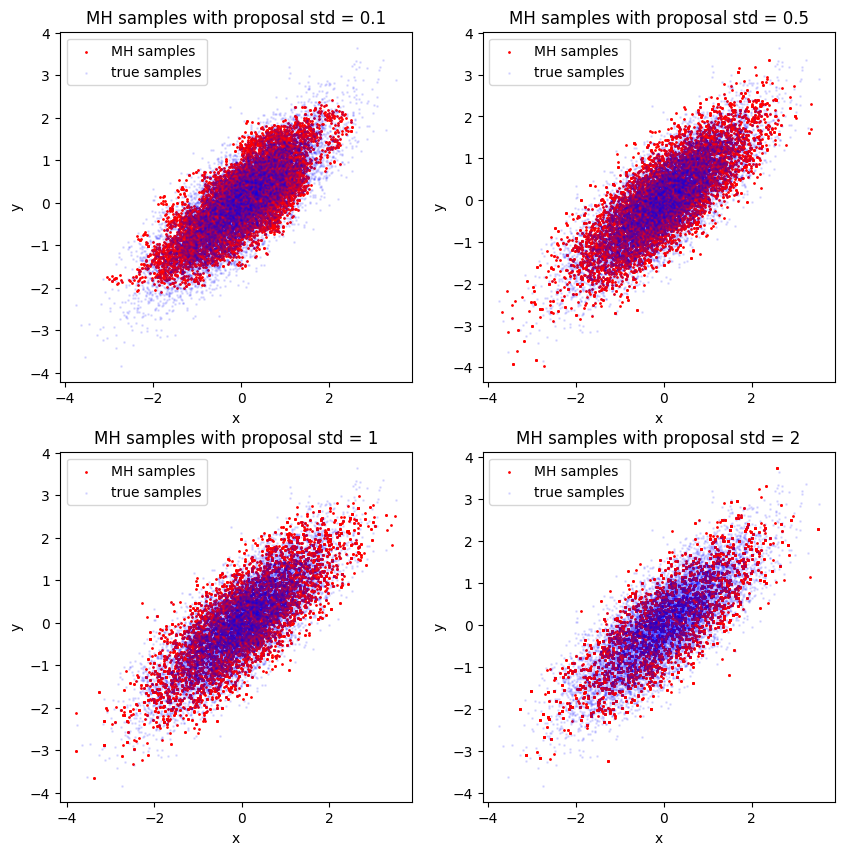

In [4]:
mean = [0,0]
cov = [[1,0.8],[0.8,1]]

proposal_stds = [0.1, 0.5, 1, 2]
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, proposal_std in enumerate(proposal_stds):
    results,rate=metropolis_hastings_gaussian(num_samples, mean, cov, proposal_std, burn_in=0)
    axs[i].scatter(results[:,0], results[:,1], s=1, color='red',label='MH samples')
    axs[i].scatter(samples[:,0], samples[:,1], s=1, color='blue', alpha=0.1, label='true samples')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].set_title('MH samples with proposal std = {}'.format(proposal_std))
    axs[i].legend()
    print('Acceptance rate with proposal std = {}: {}%'.format(proposal_std,rate*100))

plt.show()

**Q2.4 Derive the conditionals $p(\theta_1|\theta_2^{t}, x)$ and $p(\theta_2|\theta_1^{t}, x)$.**

Both $p(\theta_1|\theta_2^{t}, x)$ and $p(\theta_2|\theta_1^{t}, x)$ can be derived from $p(\theta|x)$ using Bayes rule.\
Given $p(\theta|x) = \mathcal{N}(\theta|x, \Sigma)$ we have that
$$
p(\theta_2 | \theta_1^{t}, x) = \frac{p(\theta_1^{t}, \theta_2 | x)}{p(\theta_1^{t} | x)}
$$
where 
$$
p(\theta_1^{t}, \theta_2 | x) = \mathcal{N}(\theta | x, \Sigma)
$$
and
$$
p(\theta_1^{t} | x) = \int_{\mathbb{R}} p(\theta_1^{t}, \theta_2 | x) d\theta_2 = \mathcal{N}(\theta_1^{t} | x, \Sigma_{11})
$$
Therefore we have that
$$
p(\theta_2 | \theta_1^{t}, x) = \frac{\mathcal{N}(\theta | x, \Sigma)}{\mathcal{N}(\theta_1^{t} | x, \Sigma_{11})}
$$
By expaning the pdfs we have that
$$
p(\theta_2 | \theta_1^{t}, x) = 
\frac
{\frac{1}{2\pi |\Sigma|^{1/2}} exp{(-\frac{1}{2}(\theta-\mu)^T\Sigma^{-1}(\theta-\mu))}}
{\frac{1}{\sqrt{2\pi} |\Sigma_{11}|^{1/2}} exp{(-\frac{1}{2\Sigma_{11}^2}(\theta_{1}^{t}-\mu_1)^2)}}
$$
We can simplify the expression and obtain that
$$
p(\theta_2 | \theta_1^{t}, x) = 

\frac{1}{\sqrt{2\pi \Sigma_{2|1}^2}}exp{(-\frac{1}{2\Sigma_{2|1}^2}(\theta_2-x_{2|1})^2)}
$$
where
$$
\Sigma_{2|1}^2 = \Sigma_{22} - \Sigma_{21}\Sigma_{11}^{-1}\Sigma_{12}
$$
and
$$
x_{2|1} = \mu_2 + \Sigma_{21}\Sigma_{11}^{-1}(x_1-\mu_1)
$$
Similarly we can derive $p(\theta_1|\theta_2^{t}, x)$ by swapping the indices $1$ and $2$ in the above equations.


**Write a Gibbs sampler which you then use in order to generate 10k samples from $p(\theta|x)$. Scatter plot the results.**

Since $x = (0, 0)$ we have that:
$$ \begin{pmatrix}
\theta_1 \\
\theta_2 
\end{pmatrix}  
\sim
\begin{bmatrix}
\begin{pmatrix}
0 \\
0
\end{pmatrix}
,

\begin{pmatrix}
1 & \rho \\
\rho & 1 
\end{pmatrix}  

\end{bmatrix} $$

From properties of a bivariate gaussian distribution we know:
$$\theta_1|\theta_2 \sim N(\rho\theta_2, 1-\rho^2)$$
$$\theta_2|\theta_1 \sim N(\rho\theta_1, 1-\rho^2)$$

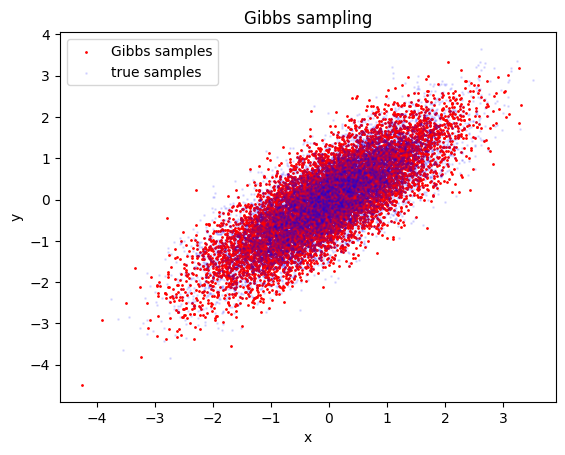

In [5]:
# Gibbs sampler

# from the covariance matrix we know:
rho = 0.8
z_1 = 0
z_2 = 0

z_1_fin = []
z_2_fin = []

T = 10000
for i in range(1, T+1):

    # the conditional distribution is proportional to the joint distribution
    z_1 = np.random.normal(rho*z_2, np.sqrt(1-rho**2))
    z_1_fin.append(z_1)
    z_2 = np.random.normal(rho*z_1, np.sqrt(1-rho**2))
    z_2_fin.append(z_2)

plt.scatter(z_1_fin, z_2_fin, s=1, color ='red', label='Gibbs samples')
plt.scatter(samples[:,0], samples[:,1], s=1, color='blue', alpha=0.1, label='true samples')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gibbs sampling')
plt.legend()

# ***3. The Bayesian Burglars***

In this assignment we will act as burglars who decide whether to break into a house or not using Bayesian decision theory.

Let $C(x, h)$ be the cost of decision $x$ given the state, $h$. $x\in\{0, 1\}$ is the decision to break in or not, and $h\in\{0,1\}$ tells us if the house owners are home or not. The break-in would last during the time interval $Δt$ and we can not know $h$ during $Δt$ before taking a decision. In order to be data driven decision makers, we have collected $N$ data points, $\mathcal{D}=\{y_i, \tau_i\}_{i=1}^N$, where $y_i$ is a binary variable indicating if the home owners are home, and $\tau_i$ is the time point of the observation.

Based on our data, we seek to take a Bayesian approach to the problem. Namely, we want to compute the *Bayes risk* associated with breaking and entering *or not* breaking and entering during a given time slot $$\mathcal{R}(Δt) = \sum_{x=0}^1\mathbb{E}_{p(h|Δt, \mathcal{D})}\left[ C(x, h)\right],$$ where $$p(h|Δt, \mathcal{D}) = \int_0^1 p(h, \theta|Δt, \mathcal{D}) d\theta = \int_0^1 p(h|\theta)p(\theta|Δt, \mathcal{D}) d\theta,$$ is the predictive posterior distribution, and $\theta$ is the probability that the house owners are home.

***Take a moment to appreciate how powerful the Bayes risk quantity is. Yes, here we are using it in a silly setting, but it is widely applicable to all sorts of advanced and simple problems where it makes sense to quantify the risk or expected gain.***

Let's rewrite the risk expression in terms of the predictive posterior $$\mathcal{R}(Δt) = \sum_{x=0}^1\mathbb{E}_{\int p(h|\theta) p(\theta|Δt, \mathcal{D})d\theta}\left[ C(x, h)\right]$$ and write out the posterior over $\theta$ using Bayes' rule $$p(\theta|Δt, \mathcal{D}) = \frac{p(\mathcal{D}|\theta, \Delta t)p(\theta)p(Δt)}{p(\mathcal{D}, Δt)}.$$
Unfortunately, $p(\theta|Δt, \mathcal{D})$ is intractable as it involves the computation of a nasty marginal likelihood. However, we *do* know how to compute the joint distribution (the numerator), so we decide to solve the problem using a Metropolis-Hastings algorithm!

To summarize the objective of the exercise, we want to compute the risk function above. To do this, we need to compute an expectation with respect to the intractable posterior predictive distribution. Instead, we can approximate the posterior predictive by sampling from the posterior over $\theta$ via MH. Then, using the approximation of $p(h|Δt, \mathcal{D})$, the risk function can be computed for both choices of $x$. The exercise is divided into a series of subproblems.

****

## **The distributions and functions in the generative model**

**The likelihood function** is a conditional Bernoulli likelihood $$p(\mathcal{D}|\theta, \Delta t) = \prod_{i=1}^N \theta^{\mathbb{1}\{(y_i = 1)\wedge (\tau_i \in \Delta t)\}}(1-\theta)^{\mathbb{1}\{(y_i = 0)\wedge (\tau_i \in \Delta t)\}}(1/2)^{\mathbb{1}\{\tau_i \notin \Delta t\}},$$ where $\wedge$ is the logical "AND" character.

**The $\theta$ prior** is a Beta distribution $$p(\theta) = \text{Beta}(\theta|\alpha, \beta)$$ with hyperparams $\alpha, \beta$.

**The $\Delta t$ prior**, i.e. the prior belief of during which time slot it is appropriate to perform the break in, is unnormalized and factorisable $$p(\Delta t) = p(t_u|t_l)p(t_l)$$ with $$p(t_l) = \mathbb{1}\{t_l\in [0, 3600\cdot24]\}$$ and $$p(t_u|t_l) = \mathbb{1}\{t_u\in [t_l + 3600, 3600\cdot24]\},$$ where $t_u$ denotes upper bound of the break-in time slot, and $t_l$ the lower bound. In other words, when the break in ends and starts. At shortest, the break in has to last one hour, $3600$ seconds, which is reflected in the trunctation using the lower bound in $p(t_u|t_l)$.

****

## **The proposal distributions in the MH algorithm**

**The proposal for $\theta$** is a mirrored uniform distribution with step size $\epsilon$, conditioned on the previous state, $\theta^{(k-1)}$.

**The proposal for $t_l$** is a normal distribution with step size $\sigma^2$, conditioned on the previous state value for $t_l$, $t_l^{(k-1)}$.

**The proposal for $t_u$** is a truncated exponential distribution with CDF $$F(t_u|t_l, \lambda) = 1 - e^{-\lambda(t_u - U)},$$ and rate parameter $\lambda.$ Here $U = 3600 + t_l$ is the size of the truncation, which ensures that proposed ending times for the break in occur at least $3600$ seconds after the proposed start of the break in, $t_l$.

**Q3.1 In the following three subproblems, you will define and visualize the proposals**

**Q3.1.1.
A mirrored (one-dimensional) uniform distribution only admits density in a specified interval, *mirroring back* whatever part of its support falls outside the interval back on to the interval. The density that falls outside the interval is superpositioned on top of the non-mirrored density.**

**Using indicator functions, formulate the pdf $q(\theta|\theta^{(k-1)})$. Implement the distribution in numpy (you should be able to sample from it, and evaluate its likelihood). Show are you are able to sample from it by sampling 1000 samples and plotting them in a histogram. Use $\theta^{(k-1)}=0.2$ and $\epsilon = 0.3$ when sampling**.

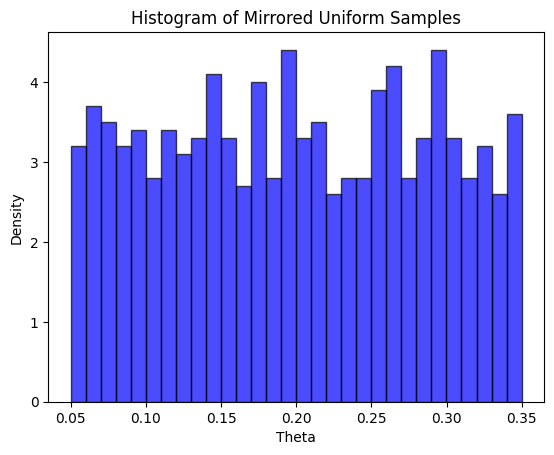

In [6]:
def mirrored_uniform_pdf(theta, theta_prev, epsilon):
    indicator_1 = (theta_prev - epsilon/2 < theta) & (theta < theta_prev + epsilon/2)
    indicator_2 = (theta_prev - epsilon/2 < theta - 1) & (theta - 1 < theta_prev + epsilon/2)
    
    return 1 / (2 * epsilon) * (indicator_1 + indicator_2)

# Sample from the mirrored uniform distribution
def sample_mirrored_uniform(theta_prev, epsilon, num_samples=1000):
    samples = np.zeros(num_samples)
    for i in range(num_samples):
        proposal = np.random.uniform(theta_prev - epsilon/2, theta_prev + epsilon/2)
        # Apply mirror effect at the boundaries
        proposal = proposal if 0 <= proposal <= 1 else (proposal % 1)
        samples[i] = proposal
    return samples


theta_prev = 0.2
epsilon = 0.3

# Sample from the mirrored uniform distribution
samples = sample_mirrored_uniform(theta_prev, epsilon)

# Plot histogram
plt.hist(samples, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Mirrored Uniform Samples')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.show()

**Q3.1.2 Formulate the pdf of $q(t_l|t_l^{(k-1)})$ with a variable $\sigma^2$. You will need to choose a step size, $\sigma^2$, before starting the experiment.**

Answer:

The pdf of q is a normal with mean $t_l^{(k-1)}$ and variance $\sigma^2$, so $t_l|t_l^{(k-1)} \sim N(t_l^{(k-1)},\sigma^2)$

**Q3.1.3 Use the given CDF to formulate the pdf of the proposal distribution, $q(t_u|t_l)$. Sampling from this pdf is not directly supported in numpy. Use the inverse-sampling trick to sample 1000 samples from it as you let $t_l=0$. Visualize the histrogram of the samples with a plot.**

Answer: 

To use the inverse-sampling trick we must first determine the inverse of the CDF function:

We will use the following notation: 

- $x=t_u$
- $y=F(t_u|t_l,\lambda)=1-e^{-\lambda(x-U)}$

Now we will determine the inerse CDF of $y$:

$$1-y=e^{-\lambda(x-U)}$$
$$x=U-\frac{\ln(1-y)}{\lambda}$$
$$F^{-1}(y)=U-\frac{\ln(1-y)}{\lambda}$$


In [7]:
class custom_dist(sp.stats.rv_continuous):
    def __init__(self, U=3600,lam=1/900):
        super().__init__()
        self.U = U
        self.lam = lam
       
    def _pdf(self, x):
        return np.exp(-self.lam*x + self.lam*self.U)*(self.lam)
    
    
    def _inverse_cdf(self, y):
        """Inverse of the cumulative distribution function."""
        return self.U-np.log(1-y)/(self.lam)

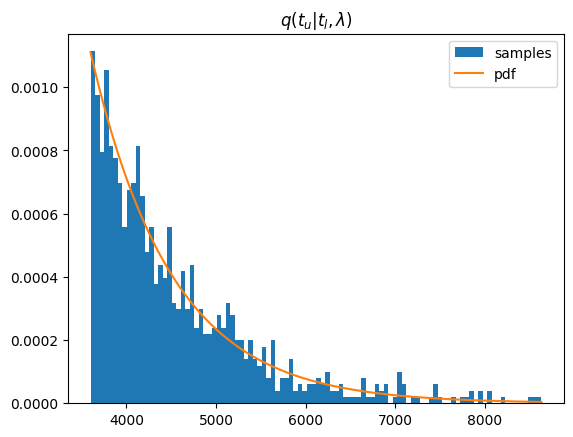

In [8]:
# since t_l=0, U=3600

distribution = custom_dist()

uniform_samples = np.random.uniform(0,1,1000)
samples = distribution._inverse_cdf(uniform_samples)
x = np.linspace(3600, max(samples), 1000)

plt.hist(samples,bins=100,density=True, label='samples')
plt.plot(x, distribution.pdf(x), label='pdf')
plt.title('$q(t_u|t_l, \lambda)$')
plt.legend()

****
# **Generating data and implementing the algorithm**
Next we need data. Use the following cell to generate the data and take a moment to reflect about the data-generating process. Beyond this cell, we will forget about the underlying data-generating process.

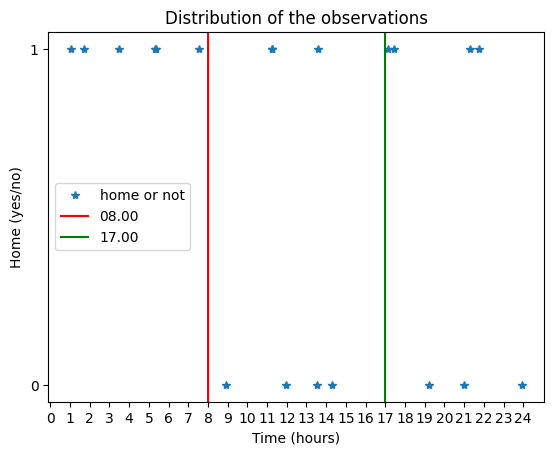

In [9]:
def generate_data(N=30):
    # we more frequently go to collect data during the middle of the day
    part_of_day = np.argmax(
        np.random.multinomial(1, [1/4, 1/2, 1/4], N), axis=-1
        )
    time_intervals_low = np.array([0.0, 8 * 3600, 17 * 3600])
    time_intervals_high = np.array([8 * 3600, 17 * 3600, 24 * 3600])

    # after deciding which part of the day to go collect data,
    # the exact time point is uniformly chosen
    tau_i = np.random.uniform(low=time_intervals_low[part_of_day],
                      high=time_intervals_high[part_of_day])

    # probabilities that the owners are home or not depend on the part of the day
    home_prob = np.array([0.9, 0.2, 0.7])

    # randomly sample the event that the owners are home
    u = np.random.uniform(0, 1, N)
    y_i = (u < home_prob[part_of_day]).astype(float)

    # the data is composed of N combinations of home-or-not events and time points
    return y_i, tau_i


# do not change the seed or the number of observations, N
np.random.seed(0)
D = generate_data(N=20)

idx = np.argsort(D[1])
plt.plot(D[1][idx] / 3600., D[0][idx], '*', label='home or not')
plt.axvline(8, 0, 1, c='r', label='08.00')
plt.axvline(17, 0, 1, c='g', label='17.00')
plt.xlabel('Time (hours)')
plt.ylabel('Home (yes/no)')
plt.yticks([0, 1])
plt.xticks(np.arange(25))
plt.legend(loc='center left')
plt.title('Distribution of the observations')
plt.show()

**Q3.2 Implement the MH algorithm. Run it until convergence, where you decide when the chains have convergenced. Motivate your convergence statement by using the convergence diagnostics discussed in the lectures. Convey your arguments with plots and numbers. A mandatory convergence diagnostic is to run and compare multiple chains.**

**Before you are ready to implement the algorithm, you need to select the two step sizes, $\epsilon$ and $σ^2$. Specify clearly your choices, and motivate them. There are no right or wrong choices, but better or worse alternatives. It is OK to revise your choices after evaluating the acceptance ratio of the MH algorithm, but here you should share your a priori beliefs.**

**Finally, let $\lambda=900$ and $\alpha=\beta=1$**

*Answer question regarding choice of $\epsilon$ here* \
As $\epsilon$ increases we define a wider interval for the uniform distribution, thus we are able to explore more values of $\theta$ in each iteration. However, if $\epsilon$ is too large we will have a low acceptance rate, since the probability of proposing a value outside the interval is high. On the other hand, if $\epsilon$ is too small we will have a high acceptance rate, but we will not be able to explore the space of $\theta$ values. Therefore, we want to choose a value of $\epsilon$ that is not too small nor too large. We will choose $\epsilon=1$.

*Answer question regarding choice of $\sigma^2$ here* \
The value of $\sigma^2$ does not affect the result as we are not making use of the proposal distribution over $t_l$ in the MH algorithm. 

Answer:

We need to compute the predictive posterior $p(h|Δt, \mathcal{D})$, which is intractable.

Instead we sample from the posterior $p(\theta|Δt, \mathcal{D})$ via MH since we can compute the joint distribution $p(\mathcal{D}|\theta, \Delta t)p(\theta)p(Δt)$

We have the following distributions:

- $p(\mathcal{D}|\theta, \Delta t) = \prod_{i=1}^N \theta^{\mathbb{1}\{(y_i = 1)\wedge (\tau_i \in \Delta t)\}}(1-\theta)^{\mathbb{1}\{(y_i = 0)\wedge (\tau_i \in \Delta t)\}}(1/2)^{\mathbb{1}\{\tau_i \notin \Delta t\}}$
- $p(\theta) = \text{Beta}(\theta|\alpha, \beta)$ with hyperparams $\alpha, \beta$
- $p(\Delta t) = p(t_u|t_l)p(t_l)$ 
- $p(t_l) = \mathbb{1}\{t_l\in [0, 3600\cdot24]\}$ 
- $p(t_u|t_l) = \mathbb{1}\{t_u\in [t_l + 3600, 3600\cdot24]\}$

And the following proposals:

- $q(\theta|\theta^{(k-1)})$ is mirrored uniformed distribution with step size $\epsilon$


In [10]:
# implement the MH algorithm here

# theta is the probability that house owners are home
# D[0] contains the y_i (home or not)
# D[1] contains the time points
def metropolis_hastings(num_samples, data, epsilon, alpha_param, beta_param,  
                        tl, tu, burn_in=0.0, max_lag = 30, thin_rate=1,seed=0):
    

    def p_theta(o):
        return beta.pdf(o, alpha_param, beta_param)
    
    def p_t(t, lower, higher):
        if t < lower or t > higher:
            return 0
        else:
            return 1
        
    def p_delta_t(tl, tu):
        if p_t(tl,0,3600)*p_t(tu,tl+3600,tl+3600*24) == 1:
            return 1
        else:
            return 0
        
    def p_data(y, tau, o, tl, tu, n):
        p = 1
        for i in range (n):
            if p_t(tau[i],tl,tu) == 0:
                p = p * 0.5
            else:
                if y[i]==1:
                    p = p * o
                else:
                    p = p * (1-o)
        return p

    def q_theta(theta, theta_prev):
        indicator_1 = (theta_prev - epsilon/2 < theta) & (theta < theta_prev + epsilon/2)
        indicator_2 = (theta_prev - epsilon/2 < theta - 1) & (theta - 1 < theta_prev + epsilon/2)
        return 1 / (2 * epsilon) * (indicator_1 + indicator_2)
    
    np.random.seed(seed) # set the seed for reproducibility

    samples = np.zeros(num_samples)
    # intial step
    samples[0] = np.random.uniform(0, 1)

    accept_count = 0

    for i in range(1, num_samples):

        #  new candidate
        new_sample = np.random.uniform(samples[i-1]-epsilon/2, samples[i-1]+epsilon/2)

        # mirroring
        if new_sample < 0:
            new_sample = -new_sample
        if new_sample > 1:
            new_sample = 1 - (new_sample-1)
       
        # compute the acceptance probability
        p = (p_theta(new_sample)*p_data(data[0], data[1], new_sample, tl, tu, len(data[0])))/ \
            (p_theta(samples[i-1])*p_data(data[0], data[1], samples[i-1], tl, tu, len(data[0])))
        q = q_theta(new_sample, samples[i-1])/q_theta(samples[i-1], new_sample)

        accep_p = min(1,p/q)
                
        # accept or reject the new sample
        if np.random.uniform(0, 1) < accep_p:
            samples[i] = new_sample
            # update the acceptance count only after the burn-in period
            if (i > int(burn_in*num_samples)):
                accept_count += 1
        else:
            samples[i] = samples[i-1]

    samples = samples[int(burn_in*num_samples):]
    accept_rate =  np.around(accept_count/len(samples), decimals=3)
    
    if (thin_rate > 1):
        samples = samples[::int(thin_rate)]

    #Compute autocorrelation 
    autocorr = np.zeros(max_lag)
    samples_mean = np.mean(samples)
    for lag in range(max_lag):
        num = 1/(len(samples)-lag)*\
                np.sum([(samples[i]-samples_mean)*(samples[i+lag]-samples_mean) for i in range(len(samples)-lag)])
        den = 1/(len(samples)-1)*np.sum([(samples[i]-samples_mean)**2 for i in range(len(samples))])
        autocorr[lag] = num/den


    return samples, accept_rate, autocorr

In [12]:
#Multiple chains with burn-in period
def multiple_chain_mh(num_runs, num_samples, data, epsilon, alpha_param, beta_param,  
                        tl, tu, burn_in=0.0, max_lag = 30, thin_rate=1,ax = None):
    
    chains=list()
    accept_rates=list()
    
    for i in range(num_runs):
        res,rate,_ = metropolis_hastings(num_samples=num_samples, data=data, epsilon=epsilon, 
                              alpha_param=alpha_param, beta_param=beta_param,  tl=tl*3600.0, tu=tu*3600.0, burn_in=burn_in, max_lag = max_lag, thin_rate=thin_rate, seed=i)
        chains.append(res)
        accept_rates.append(rate)
    
    for i in range(num_runs):
        ax.plot(chains[i], label='Chain {}'.format(i))
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Theta')
    ax.set_title('Chains {:.2f}-{:.2f}'.format(tl,tu))
    ax.legend()
    
    
    return chains, accept_rates

Multiple runs are performed for each time slot with different initialization values and the acceptance rates are computed.

Acceptance rates 1.00-2.00: [0.691, 0.686, 0.68]
Acceptance rates 13.00-14.00: [0.754, 0.753, 0.744]
Acceptance rates 21.00-22.00: [0.691, 0.686, 0.68]


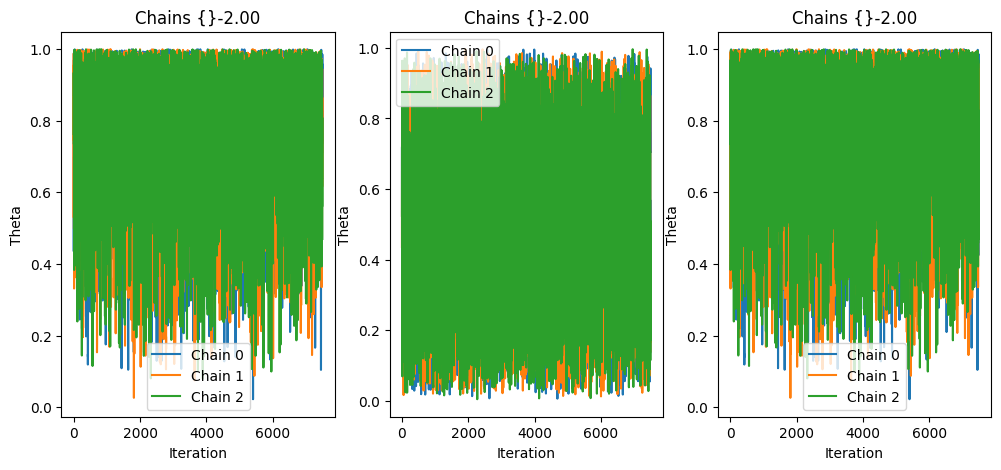

In [13]:
tl_s = [1.0, 13.0, 21.0]
tu_s = [2.0, 14.0, 22.0]
epsilon = 1

fig, axs = plt.subplots(1, 3, figsize=(12,5))
axs.flatten()
rates_i = list()

for i in range(3):
    _,rates=multiple_chain_mh(num_runs=3, num_samples=10000, data=D, epsilon=epsilon, alpha_param=1, beta_param=1,  
                        tl=tl_s[i], tu=tu_s[i], burn_in=0.25,ax = axs[i])
    rates_i.append(rates)

for i in range(3):
    print('Acceptance rates {:.2f}-{:.2f}: {}'.format(tl_s[i],tu_s[i],rates_i[i]))

Different rates for thinning are tested and the resulting autocorrelation function values are plotted.

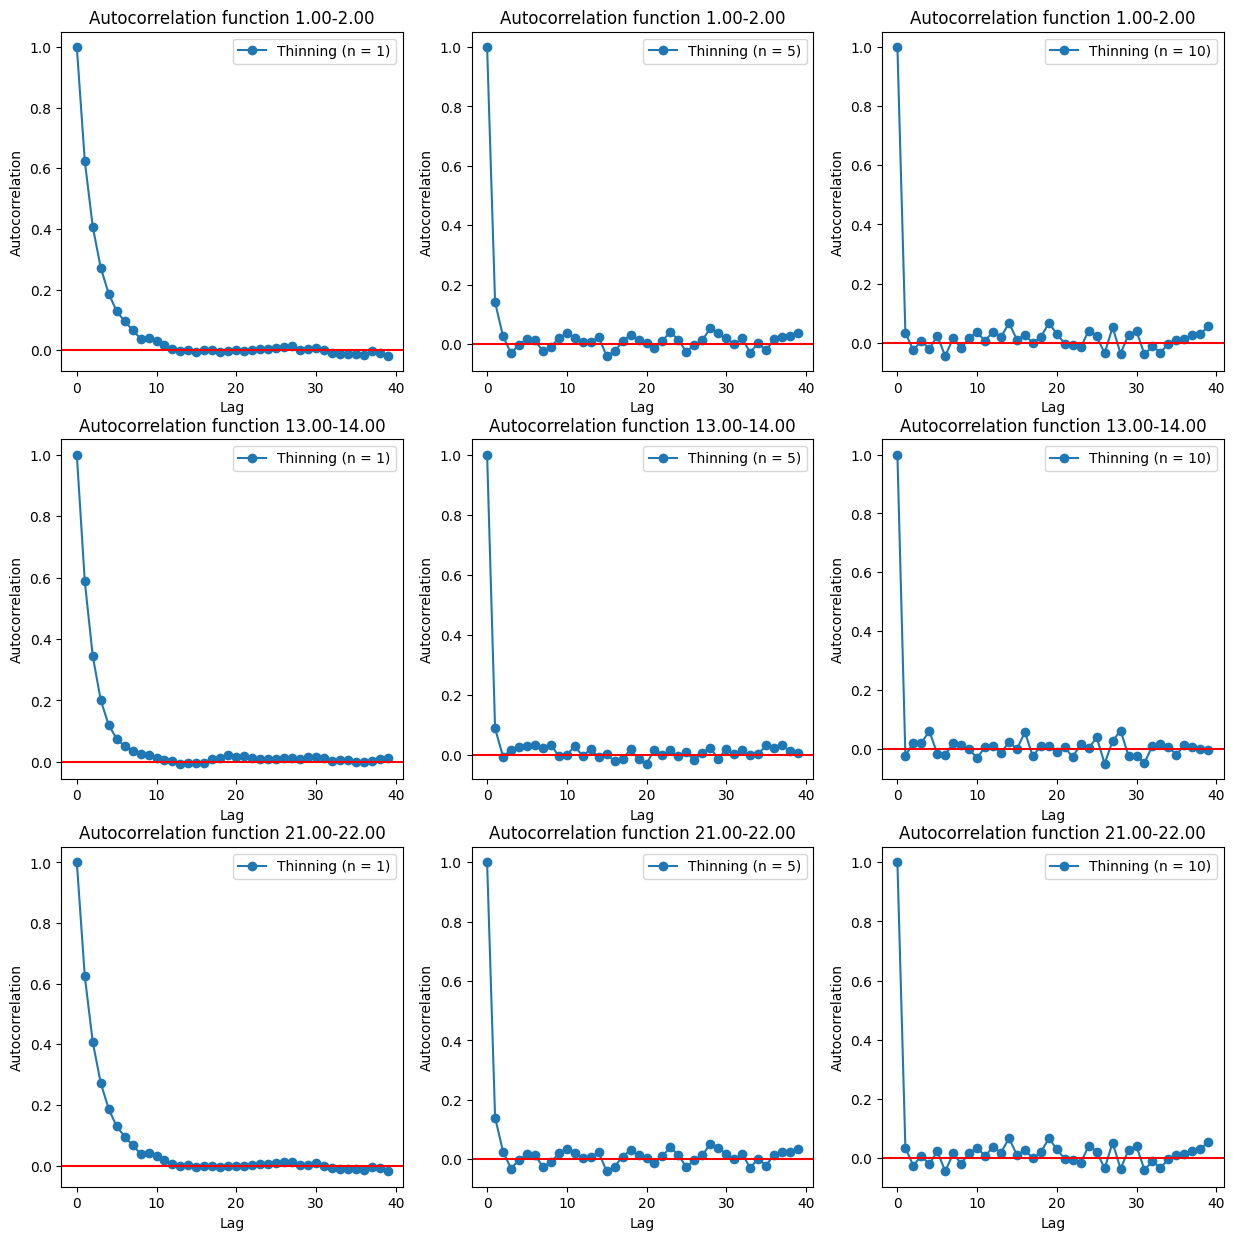

In [14]:
#Effect of thinning on the autocorrelation function
thin_rates = [1,5,10]
autoccors=list()
autoccors2=list()
autoccors3=list()

for thin_rate in thin_rates:
    _,_,autocorr_value = metropolis_hastings(num_samples=num_samples,data=D, epsilon=epsilon, 
                              alpha_param=1, beta_param=1,  tl=1.0*3600, tu=2.0*3600, burn_in=0.25, max_lag = 40, thin_rate=thin_rate, seed = 0)
    autoccors.append(autocorr_value)

for thin_rate in thin_rates:
    _,_,autocorr_value2 = metropolis_hastings(num_samples=num_samples,data=D, epsilon=epsilon, 
                              alpha_param=1, beta_param=1,  tl=13.0*3600, tu=14.0*3600, burn_in=0.25, max_lag = 40, thin_rate=thin_rate, seed = 0)
    autoccors2.append(autocorr_value2)
    
for thin_rate in thin_rates:
    _,_,autocorr_value3 = metropolis_hastings(num_samples=num_samples,data=D, epsilon=epsilon, 
                              alpha_param=1, beta_param=1,  tl=21.0*3600, tu=22.0*3600, burn_in=0.25, max_lag = 40, thin_rate=thin_rate, seed = 0)
    autoccors3.append(autocorr_value3)

f,axs = plt.subplots(3, len(thin_rates), figsize=(15,15))
for i in range(len(thin_rates)):
    axs[0,i].plot(autoccors[i],'-o', label='Thinning (n = {})'.format(thin_rates[i]))
    axs[0,i].axhline(0, 0, 1, c='r')
    axs[0,i].set_title('Autocorrelation function (thinning, n = {})'.format(thin_rates[i]))
    axs[0,i].set_xlabel('Lag')
    axs[0,i].set_ylabel('Autocorrelation')
    axs[0,i].set_title('Autocorrelation function 1.00-2.00')
    axs[0,i].legend()

for i in range(len(thin_rates)):
    axs[1,i].plot(autoccors2[i],'-o', label='Thinning (n = {})'.format(thin_rates[i]))
    axs[1,i].axhline(0, 0, 1, c='r')
    axs[1,i].set_title('Autocorrelation function (thinning, n = {})'.format(thin_rates[i]))
    axs[1,i].set_xlabel('Lag')
    axs[1,i].set_ylabel('Autocorrelation')
    axs[1,i].set_title('Autocorrelation function 13.00-14.00')
    axs[1,i].legend()

for i in range(len(thin_rates)):
    axs[2,i].plot(autoccors3[i],'-o', label='Thinning (n = {})'.format(thin_rates[i]))
    axs[2,i].axhline(0, 0, 1, c='r')
    axs[2,i].set_title('Autocorrelation function (thinning, n = {})'.format(thin_rates[i]))
    axs[2,i].set_xlabel('Lag')
    axs[2,i].set_ylabel('Autocorrelation')
    axs[2,i].set_title('Autocorrelation function 21.00-22.00')
    axs[2,i].legend()

The Estimated Potential Scale Reduction factor is computed for each time slot and the results are plotted.

In [15]:
def epsr_mh(num_runs,num_samples, data, epsilon, alpha_param, beta_param,  
                        tl, tu, burn_in=0.0, max_lag = 30, thin_rate=1):
    chains=list()
    for i in range(num_runs):
        res,_,_ = metropolis_hastings(num_samples=num_samples,data=data, epsilon=epsilon, 
                              alpha_param=alpha_param, beta_param=beta_param,  tl=tl*3600, tu=tu*3600, burn_in=burn_in, max_lag = 50, thin_rate=thin_rate, seed = i)
        chains.append(res)
    
    count_samples= len(chains[0])

    #Compute the mean of the chains
    chain_means =list()
    for i in range(num_runs):
        chain_means.append(np.mean(chains[i]))
    chain_mean = np.mean(chain_means)

    between_seq_var = (count_samples/(num_runs-1))*np.sum([(chain_means[i]-chain_mean)**2 for i in range(num_runs)])
    w=0
    for i in range(num_runs):
        in_sum=0
        for j in range(count_samples):
            in_sum += (chains[i][j]-chain_means[i])**2
        w = w + in_sum/(count_samples-1)

    within_seq_var  = (1/count_samples)*w


    #compute average of variances
    avg_var  = ((count_samples-1)/(count_samples))*within_seq_var + (1/count_samples)*between_seq_var

    #compute potential scale reduction factor
    epsr = np.sqrt(avg_var/within_seq_var)

    return epsr


In [16]:
tl_s = [1.0, 13.0, 21.0]
tu_s = [2.0, 14.0, 22.0]
epsilon = 1

epsr_s = list()
for i in range(len(tl_s)):
    epsr_s.append(epsr_mh(num_runs=10,num_samples=20000, data=D, epsilon=epsilon, alpha_param=1, beta_param=1,  
                        tl=tl_s[i], tu=tu_s[i], burn_in=0.25, max_lag = 50, thin_rate=8))

for i in range(len(tl_s)):
    print('Estimated Potential Scale Reduction Factor for {:.2f}-{:.2f}: {:.2f}'.format(tl_s[i],tu_s[i],epsr_s[i]))

Estimated Potential Scale Reduction Factor for 1.00-2.00: 1.03
Estimated Potential Scale Reduction Factor for 13.00-14.00: 1.01
Estimated Potential Scale Reduction Factor for 21.00-22.00: 1.03


Convergence Diagnostics:
- Burn in: discard the samples before reaching the stationary condition of the chain;
- Multiple chains: starting with different initialization can help explore and understand better the parameter space and therefore accelerate the convergence;
- Acceptance rate: indicates, in percentage, how many new proposed samples we are accepting in the MH algorithm;
- Autocorrelation function: this function expresses how much two terms of a chain are correlated based on their lag (the distance of two elements in the sequence)
- Thinning: this technique is used to reduce the autocorrelation of a chain by keeping only one every $thinRate$ samples.
- Estimated Potential Scale Reduction Factor (Rhat): is a coefficient that compares variances within and between chains; we would like this value to be close to 1, meaning that the Markov chains have converged.

****
# **Analysis**

After performing our convergence diagnostics and tuning our MH algorithm based on the convergence analysis, we are now content with our MH samples. It is time to evaluate the Bayes risk.

Let $$C(x=1, h) = \begin{cases}500 &: h = 0\\ -10000 &: h=1 \end{cases}$$ and $$C(x=0, h) = -1000, \text{for $h=0$ and $h=1$.}$$

**Q3.3.1 Explain this cost function in words.**

*Answer here*\
According to the cost function we have that the burglar will get a reward of 500 if he breaks in and the house is empty, but he will get a penalty of 10000 if he breaks in and the house is not empty. If he does not break in he will get a penalty of 1000 regardless of whether the house is empty or not.

**Q3.3.2 Compute the risk of breaking in or not breaking in between 01.00-02.00, 13.00-14.00, and between 21.00-22.00. According to the results, when should we break in? Explain the results.**

First let's fix $x$ and let's focus on the expected value of $C(h,x)$ over the probability $p(h|D,\Delta t)$. Since $h$ is a Bernoulli variable, we have that $p(h|\theta)=\theta^h(1-\theta)^{(1-h)}$. The expected value can be written as: 
$$C(0,x)p(0|D, \Delta t)+C(1,x)p(1|D, \Delta t)=C(0,x)\int_0^1 p(0|\theta)p(\theta|D, \Delta t)d\theta+C(1,x)\int_0^1 p(1|\theta)p(\theta|D, \Delta t) d\theta=$$

$$=C(0,x) \int_0^1 (1-\theta)p(\theta|D, \Delta t) d\theta+C(1,x)\int_0^1 \theta p(\theta|D, \Delta t) d\theta$$

Now we recognise that $\int_0^1 \theta p(\theta|D, \Delta t) d\theta$ is just the expected value of $\theta$ over its posterior. Hence we can use a Monte Carlo approach to get an approximation of the expected value:

$$\mathbb{E}_{p(\theta|D, \Delta t)}[\theta]=\frac{1}{N}\sum\limits_{i=1}^{N}\theta_i$$

Where the $\theta_i$ s are the samples we get through the MH algorithm. So the expression can be rewritten as:

$$\mathbb{E}_{p(h|D, \Delta t)}[C(h,x)]=C(0,x)\frac{1}{N}\sum\limits_{i=1}^{N}(1-\theta_i)+C(1,x)\frac{1}{N}\sum\limits_{i=1}^{N}\theta_i=
C(0,x)+(C(1,x)-C(0,x))\frac{1}{N}\sum\limits_{i=1}^{N}\theta_i$$

So if $x=0$ then we have that $\mathbb{E}_{p(h|D, \Delta t)}[C(h,0)]=-1000$ while if $x=1$ we need to compute the Monte Carlo estimate.

Text(0.5, 1.0, '21.00-22.00')

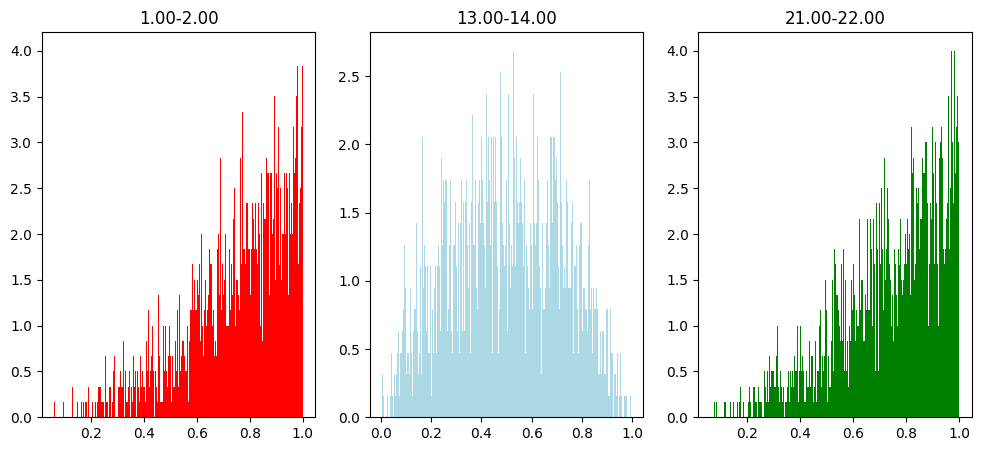

In [17]:
num_samples = 20000
epsilon = 1
burn_in  = 0.2
thin_rate = 5
results1,_,_ = metropolis_hastings(num_samples=num_samples, data=D, epsilon=epsilon, 
                              alpha_param=1, beta_param=1,  tl=1.0*3600, tu=2.0*3600, burn_in=burn_in, thin_rate=thin_rate)
results2,_,_ = metropolis_hastings(num_samples=num_samples, data=D, epsilon=epsilon, 
                              alpha_param=1, beta_param=1,  tl=13.0*3600, tu=14.0*3600, burn_in=burn_in, thin_rate=thin_rate)
results3,_,_ = metropolis_hastings(num_samples=num_samples, data=D, epsilon=epsilon, 
                              alpha_param=1, beta_param=1,  tl=21.0*3600, tu=22.0*3600, burn_in=burn_in, thin_rate=thin_rate)
fig, axs = plt.subplots(1, 3, figsize=(12,5))
axs.flatten()
axs[0].hist(results1, color='red',bins = 500, label='MH samples', density = True)
axs[0].set_title("1.00-2.00")
axs[1].hist(results2, color='lightblue',bins = 500, label='MH samples', density = True)
axs[1].set_title("13.00-14.00")
axs[2].hist(results3, color='green',bins = 500, label='MH samples', density = True)
axs[2].set_title("21.00-22.00")

In [18]:
# Monte Carlo
def MC(sam,n):
    s=0
    for i in range(n):
       s += sam[i]
    return s/n

def compute_risk(theta_values, num_samples):
    estimate_theta = MC(theta_values, num_samples)
    excpect_c_0= -1000
    expect_c_1 = 500 + (-10000 -500)*estimate_theta
    return excpect_c_0 + expect_c_1

In [19]:
print("Monte Carlo estimate of theta's expected value for 1.00-2.00: {:.2f}".format(MC(results1, len(results1))))
print("Monte Carlo estimate of theta's expected value for 13.00-14.00: {:.2f} ".format(MC(results2, len(results2))))
print("Monte Carlo estimate of theta's expected value for 22.00-23.00: {:.2f} ".format(MC(results3, len(results3))))
print("\n")
print("Risk 1.00-2.00: {:.2f}".format(compute_risk(results1, len(results1))))
print("Risk 13.00-14.00: {:.2f} ".format(compute_risk(results2, len(results2))))
print("Risk 22.00-23.00: {:.2f} ".format(compute_risk(results3, len(results3))))

Monte Carlo estimate of theta's expected value for 1.00-2.00: 0.74
Monte Carlo estimate of theta's expected value for 13.00-14.00: 0.50 
Monte Carlo estimate of theta's expected value for 22.00-23.00: 0.74 


Risk 1.00-2.00: -8307.87
Risk 13.00-14.00: -5780.97 
Risk 22.00-23.00: -8307.87 


After computing the Monte Carlo estimates of the expected values of $\theta$ for the three time slots and computing the the Bayes risk values we get that time slot 13:00-14:00 is associated with the lowest Bayes risk, while time slots 1:00-2:00 and 21:00-22:00 are associated with the same Bayes risk, which is significantly higher.

****
# **Modifying the model**
A problem with the above model is that it does not let us incorporate our prior believes of ***when*** it is more probable that the home owners are home. It is reasonable to believe that the house is empty more often during day time than night time, for instance.

**Q3.4 (Worth 5 points)**


Here, modify the prior on $\theta$ such that its hyperparameters depend on $Δt$, resulting in higher a priori probability that the house is empty between 08.00 and 17.00. Hint: use indicator functions. Clearly formulate the new generative model.

After the modification of the model, rerun the experiments above and re-evaluate the risks. ***Do not delete your previous results in the cells above! Neatly organize new code and text cells below.***

What are your reflections on the results after the modification?

In [20]:
def metropolis_hastings_modified_prior(num_samples, data, epsilon, alpha_empty,alpha_normal, beta_empty,beta_normal,
                        tl, tu, burn_in=0.0, max_lag = 30, thin_rate=1,seed=0):
    

    def p_theta(o, tl, tu, alpha_empty, beta_empty, alpha_normal, beta_normal):
        # Indicator function for the time interval where the house is likely to be empty
        is_empty_interval = 1 if tl >= 8 * 3600 and tu <= 17 * 3600 else 0

        alpha_value = alpha_empty * is_empty_interval + alpha_normal * (1 - is_empty_interval)
        beta_value = beta_empty * is_empty_interval + beta_normal * (1 - is_empty_interval)

        return beta.pdf(o, alpha_value, beta_value)
    
    def p_t(t, lower, higher):
        if t < lower or t > higher:
            return 0
        else:
            return 1
        
    def p_delta_t(tl, tu):
        if p_t(tl,0,3600)*p_t(tu,tl+3600,tl+3600*24) == 1:
            return 1
        else:
            return 0
        
    def p_data(y, tau, o, tl, tu, n):
        p = 1
        for i in range (n):
            if p_t(tau[i],tl,tu) == 0:
                p = p * 0.5
            else:
                if y[i]==1:
                    p = p * o
                else:
                    p = p * (1-o)
        return p

    def q_theta(theta, theta_prev):
        indicator_1 = (theta_prev - epsilon/2 < theta) & (theta < theta_prev + epsilon/2)
        indicator_2 = (theta_prev - epsilon/2 < theta - 1) & (theta - 1 < theta_prev + epsilon/2)
        return 1 / (2 * epsilon) * (indicator_1 + indicator_2)
    
    np.random.seed(seed) # set the seed for reproducibility

    samples = np.zeros(num_samples)
    # intial step
    samples[0] = np.random.uniform(0, 1)

    accept_count = 0

    for i in range(1, num_samples):

        #  new candidate
        new_sample = np.random.uniform(samples[i-1]-epsilon/2, samples[i-1]+epsilon/2)

        # mirroring
        if new_sample < 0:
            new_sample = -new_sample
        if new_sample > 1:
            new_sample = 1 - (new_sample-1)
       
        # compute the acceptance probability
        p = (p_theta(o = new_sample, tl=tl,tu=tu,alpha_empty=alpha_empty, alpha_normal=alpha_normal,beta_empty=beta_empty,beta_normal=beta_normal) * p_data(data[0], data[1], new_sample, tl, tu, 20)) / \
            (p_theta(o = samples[i-1],tl=tl,tu=tu,alpha_empty=alpha_empty, alpha_normal=alpha_normal,beta_empty=beta_empty,beta_normal=beta_normal)*p_data(data[0], data[1], samples[i-1], tl, tu, 20))
        q = q_theta(new_sample, samples[i-1])/q_theta(samples[i-1], new_sample)

        accep_p = min(1,p*q)
                
        # accept or reject the new sample
        if np.random.uniform(0, 1) < accep_p:
            samples[i] = new_sample
            # update the acceptance count only after the burn-in period
            if (i > int(burn_in*num_samples)):
                accept_count += 1
        else:
            samples[i] = samples[i-1]

    samples = samples[int(burn_in*num_samples):]
    accept_rate = accept_count/len(samples)
    
    if (thin_rate > 1):
        samples = samples[::thin_rate]

    #Compute autocorrelation 
    autocorr = np.zeros(max_lag)
    samples_mean = np.mean(samples)
    for lag in range(max_lag):
        num = 1/(len(samples)-lag)*\
                np.sum([(samples[i]-samples_mean)*(samples[i+lag]-samples_mean) for i in range(len(samples)-lag)])
        den = 1/(len(samples)-1)*np.sum([(samples[i]-samples_mean)**2 for i in range(len(samples))])
        autocorr[lag] = num/den


    return samples, accept_rate, autocorr

Text(0.5, 1.0, '21.00-22.00')

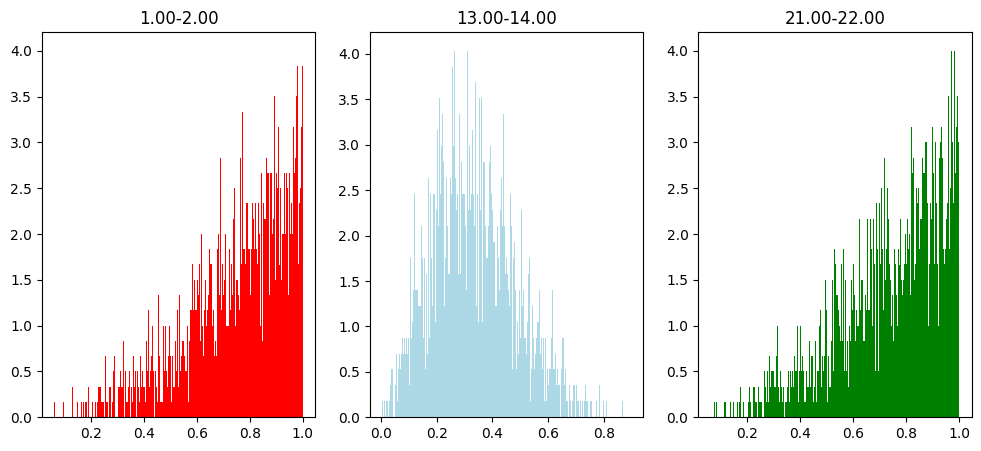

In [21]:
num_samples = 20000
epsilon = 1
burn_in  = 0.2
thin_rate = 5
results_modified_1,_,_ = metropolis_hastings_modified_prior(num_samples=num_samples, data = D,epsilon=epsilon, \
                                              alpha_empty=2,alpha_normal=1, beta_empty=5,beta_normal=1, tl=1.0*3600, tu=2.0*3600, burn_in=burn_in, thin_rate=thin_rate)
results_modified_2,_,_ = metropolis_hastings_modified_prior(num_samples=num_samples, data=D, epsilon=epsilon, \
                                              alpha_empty=2,alpha_normal=1, beta_empty=5,beta_normal=1, tl=13.0*3600, tu=14.0*3600, burn_in=burn_in, thin_rate=thin_rate)
results_modified_3,_,_ = metropolis_hastings_modified_prior(num_samples=num_samples,data=D, epsilon=epsilon, \
                                              alpha_empty=2,alpha_normal=1, beta_empty=5,beta_normal=1, tl=21.0*3600, tu=22.0*3600, burn_in=burn_in, thin_rate=thin_rate)
fig, axs = plt.subplots(1, 3, figsize=(12,5))
axs.flatten()
axs[0].hist(results_modified_1, color='red',bins = 500, label='MH samples', density = True)
axs[0].set_title("1.00-2.00")
axs[1].hist(results_modified_2, color='lightblue',bins = 500, label='MH samples', density = True)
axs[1].set_title("13.00-14.00")
axs[2].hist(results_modified_3, color='green',bins = 500, label='MH samples', density = True)
axs[2].set_title("21.00-22.00")

In [22]:
print("Monte Carlo estimate of theta's expected value for 1.00-2.00: {:.2f}".format(MC(results_modified_1, len(results_modified_1))))
print("Monte Carlo estimate of theta's expected value for 13.00-14.00: {:.2f} ".format(MC(results_modified_2, len(results_modified_2))))
print("Monte Carlo estimate of theta's expected value for 22.00-23.00: {:.2f} ".format(MC(results_modified_3, len(results_modified_3))))
print("\n")
print("Risk 1.00-2.00: {:.2f}".format(compute_risk(results_modified_1, len(results_modified_1))))
print("Risk 13.00-14.00: {:.2f} ".format(compute_risk(results_modified_2, len(results_modified_2))))
print("Risk 22.00-23.00: {:.2f} ".format(compute_risk(results_modified_3, len(results_modified_3))))

Monte Carlo estimate of theta's expected value for 1.00-2.00: 0.74
Monte Carlo estimate of theta's expected value for 13.00-14.00: 0.33 
Monte Carlo estimate of theta's expected value for 22.00-23.00: 0.74 


Risk 1.00-2.00: -8307.87
Risk 13.00-14.00: -4000.82 
Risk 22.00-23.00: -8307.87 


We can incorporate our prior beliefs by modifying the prior on $\theta$ such that its hyperparameters depend on $Δt$, specifically by setting $\alpha$ and $\beta$ to be different values depending on the time slot. We can do this by using indicator functions such that if the time slot is between 08.00 and 17.00 we set $\alpha$ and $\beta$ to be equal to 1, otherwise we set them to be equal to 2 and 5, respectively, thus giving more weight to the probability of the house being empty during the day.
The results obtained with the new generative model are such that the risk function is associated with a slightly less negative value for the time slot 13.00-14.00, thus confirming our intuition that the house is more likely to be empty during the day.